<a href="https://colab.research.google.com/github/a6iyyu/MachineLearning_3F_23/blob/main/JS11/LAT_JS11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📱 Praktikum 1**

Klasifikasi SVM dengan Data _Dummy Linier_

## **Langkah 1 - _Import Library_**

In [1]:
!pip install ipywidgets mpl_toolkits

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [2]:
from ipywidgets import interact, fixed
from scipy import stats
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## **Langkah 2 - Membuat Data _Dummy_**

Pada praktikum ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

Hasilnya,


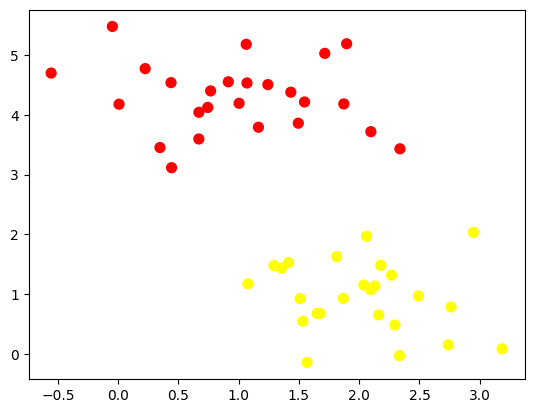

In [3]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
print("Hasilnya,")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## **Langkah 3 - Buat Ilustrasi Garis Pemisah**

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

![Ilustrasi Gambar Pemisah](https://polinema.gitbook.io/jti-modul-praktikum-pembelajaran-mesin-2025-2026/~gitbook/image?url=https%3A%2F%2F3041032130-files.gitbook.io%2F%7E%2Ffiles%2Fv0%2Fb%2Fgitbook-x-prod.appspot.com%2Fo%2Fspaces%252F5CvtE8Xh9b75jKUaRr5Y%252Fuploads%252F45Cv62BOVdLjJ4CRNyce%252Fimage.png%3Falt%3Dmedia%26token%3D01138129-394c-4a56-b940-d2fd72ca4a34&width=400&dpr=3&quality=100&sign=68776acf&sv=2)

Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.

## **Langkah 4 - Ilustrasi Margin**

Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

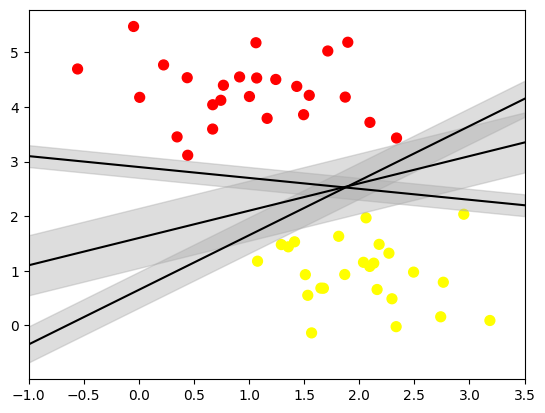

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.

## **Langkah 5 - Fitting Model**

Selanjutnya, kita akan melakukan pelatihan terhadap model SVM. Model kali ini akan menggunakan fungsi (kernel) dengan jenis linier.

In [5]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Selanjutnya buat fungsi untuk membantu visualisasi hasil fit model.

In [6]:
# Buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # Plot batas dan margin
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Lakukan plotting dengan fungsi yang telah dibuat.

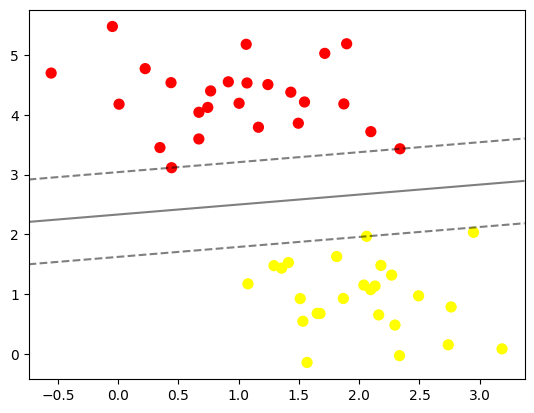

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

Beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector. Untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

In [8]:
print("Didapatkan titik,")
model.support_vectors_

Didapatkan titik,


array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

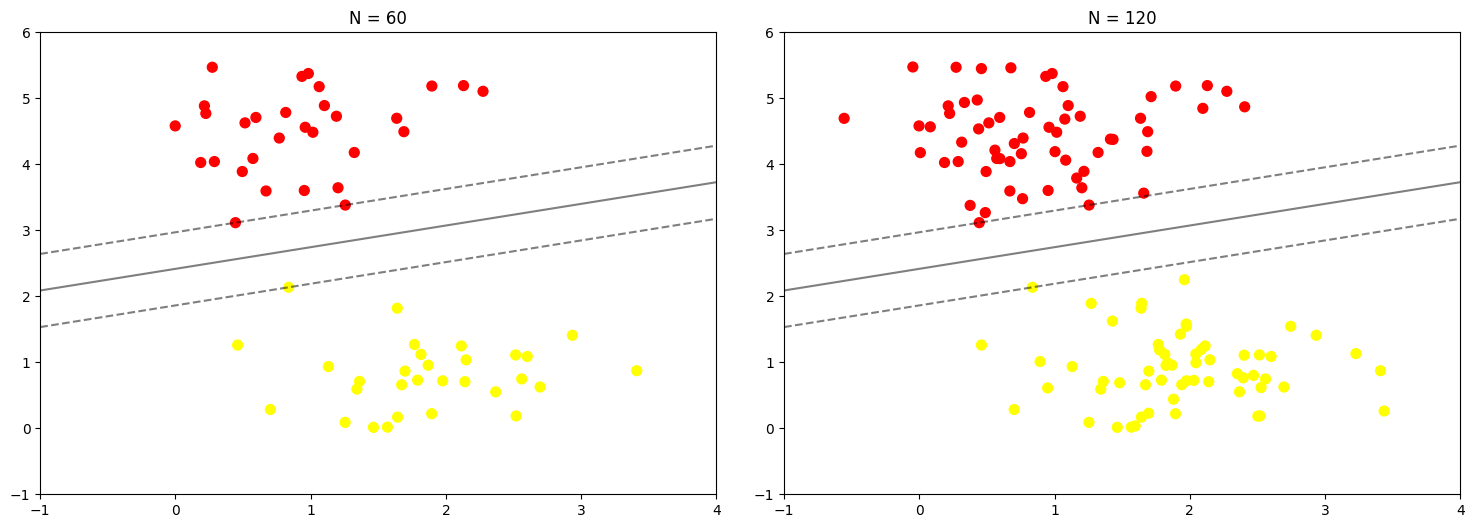

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Berdasarkan hasil di atas, perubahan jumlah data tidak mempengaruhi model yang digunakan. Ilustrasi lebih jelas dapat dilihat pada diagram di bawah ini

In [10]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

# **💻 Praktikum 2**

Klasifikasi SVM dengan Data Dummy Non-Linier

## **Langkah 1 - Ilustrasi Data Non-Linier**

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan non-linier dengan sebuah classifier linier.

### **Langkah 1a - _Import Library_**

In [11]:
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d
from scipy import stats
from sklearn.datasets import make_circles
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### **Langkah 1b - Buat Kembali Fungsi Plotting**

In [12]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### **Langkah 1c - Buat Data _Dummy_ Non-Linier**

Hasilnya,


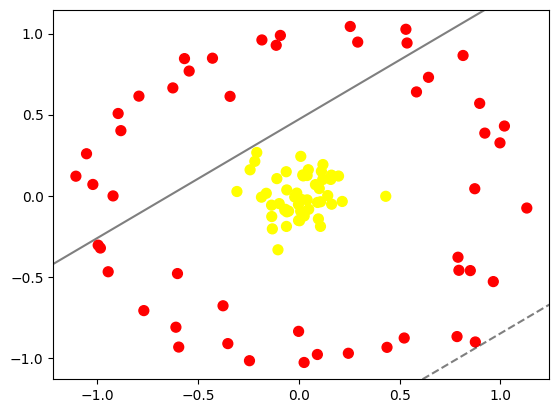

In [13]:
# contoh data tidak terpisah secara linier
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

print("Hasilnya,")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

```
r=np.exp(-(X**2).sum(1))
```

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

In [14]:
r = np.exp(-(X**2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180), X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-5.96193902e-01, -9.32894555e-01],
       [-2.03660884e-02, -7.62595440e-03],
       [-8.83349280e-01,  4.01423795e-01],
       [-2.08844828e-01,  2.66607755e-01],
       [ 8.73188978e-01,  4.33223233e-02],
       [ 9.98242851e-01,  3.26055940e-01],
       [ 8.22485257e-02,  6.86041737e-02],
       [ 9.61991165e-03,  2.42835799e-01],
       [-8.96929305e-01,  5.07127185e-01],
       [ 1.11838513e-01,  1.50785077e-01],
       [-1.34540250e-01, -1.28170761e-01],
       [ 2.60858009e-02, -1.02792613e+00],
       [ 4.87731523e-02, -8.32066713e-02],
       [ 2.15269624e-01, -3.51957078e-02],
       [ 1.07781149e-01, -3.70354406e-02],
       [ 9.69795638e-02, -1.42768775e-01],
       [ 8.97566858e-01,  5.69565332e-01],
       [-9.95953924e-01, -3.04729221e-01],
       [-1.03683562e-01, -3.33067999e-01],
       [-1.85574497e-01, -8.70883216e-03],
       [-5.94379863e-02, -9.91395008e-02],
       [-6.15877055e-02, -1.89088845e-01],
       [ 3.59288221e-03, -1.53936864e-01],
       [-6.98858345e-02, -8.88949183e-02],
       [-1.35471298e-01, -5.81050093e-02],
       [ 1.61679124e-01,  1.27019276e-01],
       [ 7.94396629e-01, -4.59581782e-01],
       [-1.10662731e+00,  1.20588868e-01],
       [ 1.18334746e-01,  9.99695402e-02],
       [-9.22218639e-01, -9.54113824e-04],
       [ 1.96958009e-01,  1.21484424e-01],
       [-1.02241932e+00,  6.96666980e-02],
       [ 1.07347778e-01, -1.88918134e-01],
       [ 9.23060404e-01,  3.86181996e-01],
       [ 8.15042188e-01,  8.64860412e-01],
       [ 1.58474411e-01,  1.00704345e-01],
       [-9.17249776e-02,  9.88531448e-01],
       [-5.67651622e-01,  8.45608017e-01],
       [ 2.55088002e-01,  1.04366138e+00],
       [ 8.50989012e-01, -4.61390360e-01],
       [ 7.89883321e-01, -3.78987612e-01],
       [ 1.48001977e-02, -2.36048643e-02],
       [-6.25406655e-01,  6.64931889e-01],
       [-1.28017866e-03, -8.36030403e-01],
       [-1.61665470e-01,  1.51682799e-02],
       [ 9.65112964e-01, -5.29252113e-01],
       [ 9.19143837e-02, -9.78664517e-01],
       [-6.26906182e-02,  1.48126888e-01],
       [-1.98043510e-03, -5.38944509e-02],
       [-1.83420396e-01,  9.60597984e-01],
       [-6.10193937e-01, -8.10497186e-01],
       [ 4.37564507e-01, -9.34634655e-01],
       [ 2.65137537e-02, -1.24432816e-01],
       [-9.74137334e-02, -4.83982916e-02],
       [-2.18546864e-01,  2.12303861e-01],
       [-9.46391571e-01, -4.68611104e-01],
       [-1.31554774e-01, -2.04192693e-01],
       [-5.10424902e-02, -9.45661554e-02],
       [ 5.37066794e-01,  9.41775381e-01],
       [-6.70501337e-02, -8.36217700e-02],
       [-6.02449295e-01, -4.79759194e-01],
       [-5.99472240e-02,  3.59126932e-02],
       [ 1.02032086e+00,  4.29839113e-01],
       [ 4.69350095e-02,  1.60542022e-01],
       [-1.01979076e-02,  1.64886064e-02],
       [-4.28703551e-01,  8.48122448e-01],
       [ 5.83817392e-01,  6.40153169e-01],
       [ 8.75916435e-01, -9.01527138e-01],
       [ 1.19523950e-01,  1.92333776e-01],
       [ 9.07029946e-03, -9.50973150e-02],
       [ 7.85082093e-01, -8.68213337e-01],
       [-3.07382435e-01,  2.62302234e-02],
       [ 2.92195158e-01,  9.47435659e-01],
       [ 6.43507085e-01,  7.30248075e-01],
       [-3.52475688e-01, -9.11562239e-01],
       [-9.85023471e-01, -3.22298577e-01],
       [-1.12388122e-01,  9.27793943e-01],
       [-2.45068160e-01, -1.01696684e+00],
       [ 1.01332362e-01,  4.44548163e-02],
       [-3.41425642e-01,  6.12798691e-01],
       [ 1.62616880e-01, -5.21054149e-02],
       [ 1.43332249e-01,  1.28864875e-03],
       [ 1.13140998e+00, -7.57138454e-02],
       [ 4.12325169e-02, -2.54146792e-02],
       [ 4.10192904e-02,  1.24852503e-01],
       [ 2.17057195e-02,  1.22400319e-01],
       [ 9.26651149e-02, -4.12309240e-02],
       [ 5.22888473e-01, -8.77086349e-01],
       [-7.69416779e-01, -7.08112907e-01],
       [-5.44403071e-01,  7.68839699e-01],
       [-7.93758437e-01,  6.14099480e-01],
       [-1.05386842e+00,  2.58987880e-01

## **Langkah 2 - Fitting Model**

Walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [15]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Plot hasil decision boundaries dari kernel RBF

Hasilnya,


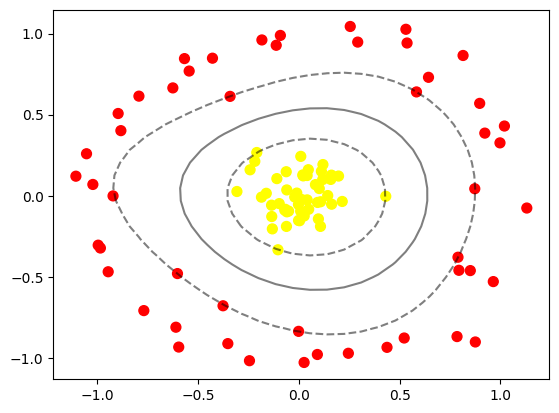

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
print("Hasilnya,")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')

# **🖥️ Praktikum 3**

SVM Data Overlapping

## **Langkah 1 - _Import Library_ dan Buat Fungsi Plotting**

In [17]:
from scipy import stats
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [18]:
# buat sebuah fungsi untuk menampilkan fitting data
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

## **Langkah 2 - Buat Data Dummy**

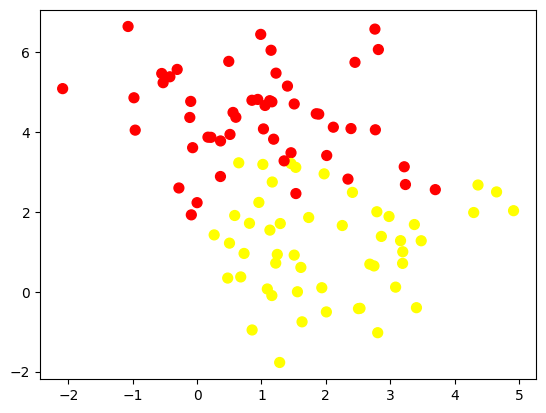

In [19]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## **Langkah 3 - Analisis Dampak Tunning**

Untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

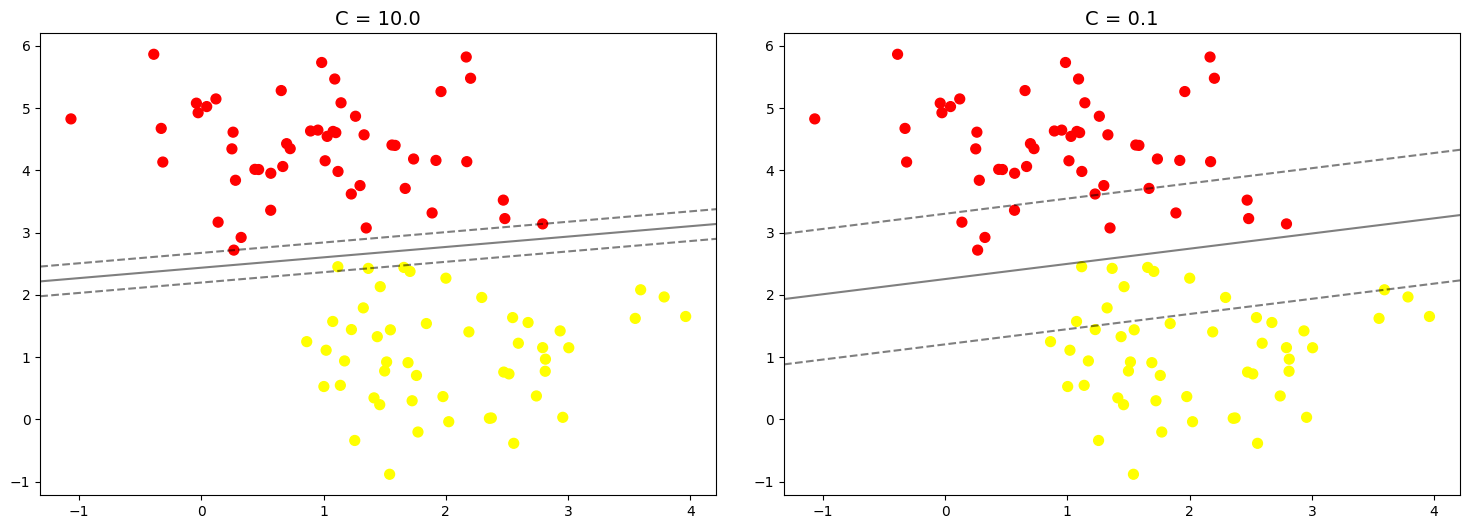

In [20]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Perlu diperhatikan bahwa nilai optimal sebuah C bergantung pada setiap dataset (melalui _cross-validation_ atau prosedur serupa).

# **🖼️ Praktikum 4**

Klasifikasi Citra Wajah

## **Langkah 0 - Unduh Dataset**

Dataset yang digunakan dapat diunduh secara langsung melalui `scikit-learn`.

In [21]:
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import seaborn as sns

In [22]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


## **Langkah 1 - Inspeksi Citra Wajah**

Lakukan inspeksi citra wajah yang akan digunakan.

Didapatkan ilustrasi,


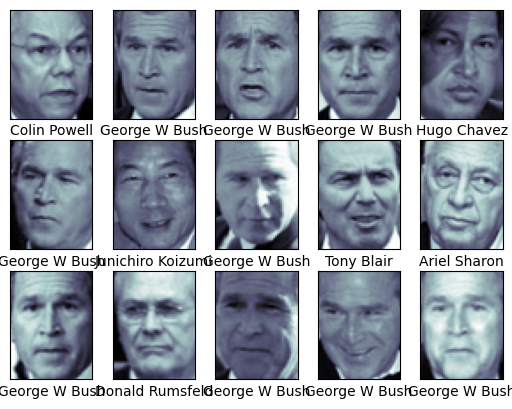

In [23]:
# contoh wajah yang digunakan
fig, ax = plt.subplots(3, 5)
print("Didapatkan ilustrasi,")
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

## **Langkah 2 - Pra Pengolahan Data**

Pada tahap ini, kita akan mencoba melakukan proses pra pengolahan data sederhana dengan menggunakan Principal Component Analysis (PCA). PCA akan memproyeksikan fitur dengan rosolusi tinggi (banyak dimensi) ke dalam principal component atau fitur yang dianggap penting saja. Metode PCA sering juga disebut sebagai metode reduksi dimensi.

In [24]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

## **Langkah 3 - Split Data**

In [25]:
# pemisahan data training dan data testing
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

## **Langkah 4 - Pembuatan Model + Tunning**

Pada langkah ini, kita akan mensimulasikan pembuatan model dan hyperparameter tunning secara langsung untuk mendapatkan nilai hyperparameter yang terbaik. Nilai tersebut dapat dicapai salah satunya dengan menggunakan teknik `GridSearch`. `GridSearch` akan mencoba menjadi kombinasi hyperparameter terbaik dengan cara melakukan pengujian performansinya satu per satu. Cara ini mudah akan tetapi memakan waktu yang lama dan komputasi yang cukup tinggi.

In [26]:
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print("Didapatkan,")
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 12s, sys: 223 ms, total: 2min 13s
Wall time: 1min 22s
Didapatkan,
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


Sehingga didapatkan informasi bahwa, hyperparameter terbaik dari model SVM yang kita buat adalah dengan, C=5 dan Gamma=0.001 dengan tingkat akurasi 82.88%.

Gunakan model terbaik tersebut untuk proses prediksi.

In [27]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

## **Langkah 5 - Cek Hasil Prediksi**

Cek hasil prediksi pada citra.

Didapatkan,


Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

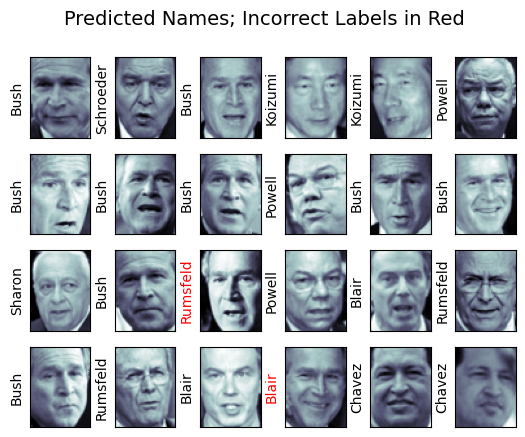

In [28]:
# hasil label pada data testing
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')

print("Didapatkan,")
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

Contoh di atas hanya menunjukkan satu data dengan label salah. Selanjutnya, kita akan mengukur performa model dengan **_classification report_** dan **_confusion matrix_**.

## **Langkah 6 - Cek Performansi**

Pertama, cek performansi dengan `classification_report` dari `sklearn`.

In [29]:
print("Didapatkan,")
print(classification_report(ytest, yfit, target_names=faces.target_names))

Didapatkan,
                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Dari tabel tersebut, kita mendapatkan informasi terkait dengan akurasi keseluruhan, presisi, _recall_, dan _f1-score_ untuk setiap label.

Selanjutnya, kita dapat menggunakan _confusion matrix_ untuk mengetahui label label yang terklasifikasi  dengan benar dan tidak.

Text(113.92222222222219, 0.5, 'predicted label')

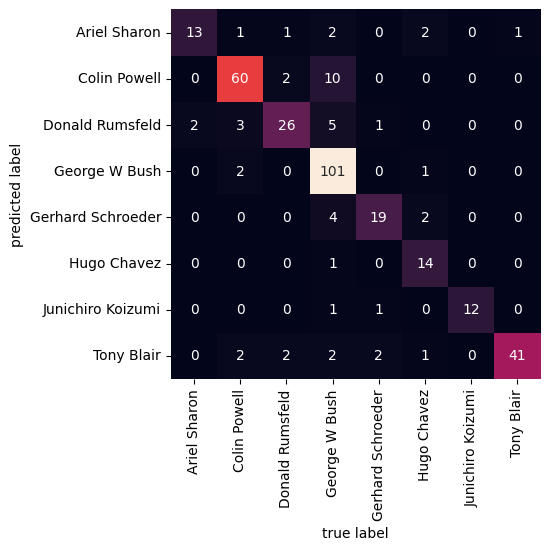

In [30]:
# bentuk confusion matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# **🌃 Praktikum 5**

Klasifikasi Citra Siang dan Malang

## **Langkah 0 - _Import Library_**

In [31]:
# Import Required Libraries
from google.colab import files
from pathlib import Path
from sklearn.metrics import accuracy_score
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import zipfile

Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python.

In [32]:
train_dir = "images/training/"

if not os.path.exists(train_dir):
    print(f"Direktori '{train_dir}' tidak ditemukan.")
    print("Silakan upload file .zip yang berisi folder 'images' Anda.")

    zip_file_name = "images.zip"
    uploaded = files.upload()

    if zip_file_name in uploaded:
        print(f"Mengekstrak '{zip_file_name}'...")
        with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
            zip_ref.extractall('.')
        print(f"Ekstraksi selesai. Direktori '{train_dir}' seharusnya sudah ada.")
    else:
        print(f"Upload gagal atau nama file bukan '{zip_file_name}'.")
else:
    print(f"Direktori '{train_dir}' ditemukan. Proses upload dilewati.")

Direktori 'images/training/' tidak ditemukan.
Silakan upload file .zip yang berisi folder 'images' Anda.


Saving images.zip to images.zip
Mengekstrak 'images.zip'...
Ekstraksi selesai. Direktori 'images/training/' seharusnya sudah ada.


In [33]:
# Image directories
train_dir = "images/training/"
test_dir = "images/test/"

## **Langkah 1 - _Load_ Data dan Visualisasikan**

Buatlah fungsi untuk membuat daftar seluruh path dari gambar.

In [34]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

_Load_ gambar training

In [35]:
# Load training data
train_img = load_dataset(train_dir)

Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.

In [36]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 99, 124, 164],
         [ 98, 123, 163],
         [ 97, 122, 162],
         ...,
         [115, 139, 177],
         [116, 140, 178],
         [117, 141, 179]],
 
        [[ 97, 122, 162],
         [ 97, 122, 162],
         [ 96, 121, 161],
         ...,
         [115, 139, 177],
         [116, 140, 178],
         [117, 141, 179]],
 
        [[ 96, 121, 161],
         [ 96, 121, 161],
         [ 97, 122, 162],
         ...,
         [115, 139, 177],
         [116, 140, 178],
         [117, 141, 179]],
 
        ...,
 
        [[129,  60,  53],
         [129,  60,  53],
         [132,  63,  56],
         ...,
         [ 38,  40,  39],
         [ 34,  36,  35],
         [ 36,  38,  37]],
 
        [[134,  63,  57],
         [135,  66,  59],
         [139,  68,  62],
         ...,
         [ 37,  39,  38],
         [ 33,  35,  34],
         [ 36,  38,  37]],
 
        [[135,  62,  56],
         [132,  61,  55],
         [136,  63,  57],
         ...,
         [ 36,  38,  37],
  

Cek ukuran gambar secara acak

In [37]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 114
(471, 640, 3)


Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar

In [38]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Lakukan visualisasi gambar secara acak

Jika fungsi visualisasi berjalan dengan benar, maka akan muncul tampilan seperti berikut,
Shape	: (889, 1280, 3)
Label	: day


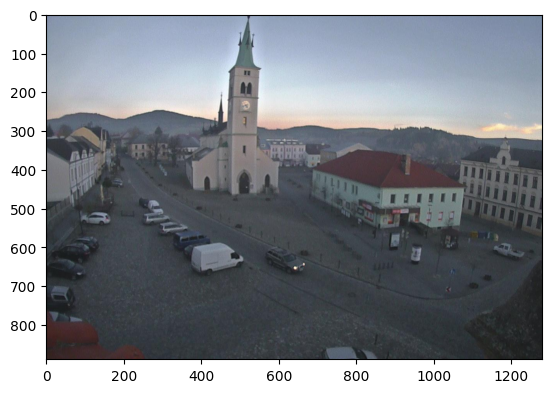

In [39]:
print("Jika fungsi visualisasi berjalan dengan benar, maka akan muncul tampilan seperti berikut,")
random_img_viz(train_img)

## **Langkah 3 - Pra Pengolahan Data**

Pada tahap ini, kita akan melakukan dua proses utama, yaitu standardisasi ukuran gambar, dan encoding label gambar.

Bualah fungsi berikut untuk menstandarkan ukuran gambar.

In [40]:
def standarized_input(image):
    std_img = cv2.resize(image, (1100,600))
    return std_img

Selanjutnya, buatlah fungsi untuk kebutuhan encoding label.

In [41]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

Terakhir, buatlah fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.

In [42]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

Lakukan pra pengolahan data pada data training.

In [43]:
train_std_img_list = preprocess(train_img)

Lakukan pengecekan ukuran gambar secara acak.

In [44]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print("Anda akan mendapatkan output seperti berikut,")
print(train_std_img_list[pick_random][0].shape)

Image 25
Anda akan mendapatkan output seperti berikut,
(600, 1100, 3)


## **Langkah 4 - Ekstraksi Fitur**

Selanjutnya, untuk dapat membadakan antara label satu dengan label yang lain, kita memerlukan sebuah fitur. Fitur adalah penciri dari sebuah data yang dapat digunakan untuk membendakan data satu dengan yang lain. Pada percobaan kali ini, kita akan menggunakan fitur yang sederhana yaitu nilai rata-rata dari tingkat kecerahan gambar (average brightness). Namun sebelum dapat melakukan hal tersebut, kita akan mengubah ruang warna (colorspace) dari RGB menjadi HSV (Hue, Saturation, Value). Hal ini dikarenakan, tingkat kecerahan (brightness) lebih mudah didapatkan dari HSV berdasarkan nilai Valuenya.

Buatlah fungsi berikut untuk mendapatkan nilai rata-rata tingkat kecerahan.

In [45]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Lakukan pengecekan pada gambar secara acak. INGAT! Gunakan gambar yang telah melalui proses pra pengolahan data!

Image 115
Avg Brighness: 125.8321
Akan didapatkan hasil output seperti pada gambar.


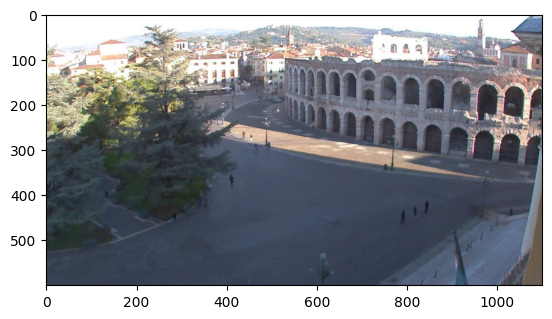

In [46]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
print("Akan didapatkan hasil output seperti pada gambar.")
plt.imshow(feature_img)

## **Langkah 5 - Klasifikasi dengan Metode Threshold**

Pada tahap ini, kita akan melakukan proses klasifikasi sederhana dengan menggunakan nilai ambang batas (threshold) dari nilai rata-rata kecerahan yang kita tentukan sendiri.

Buatlah fungsi berikut,

In [47]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Lakukan pengecekan prediksi secara acak pada data training

Hasilnya akan seperti pada gambar
Image 236
Actual label: 0
Predicted label: 0


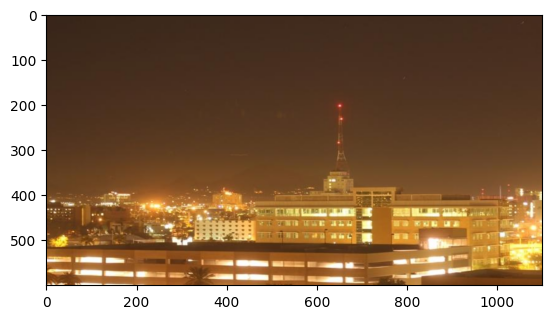

In [48]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print("Hasilnya akan seperti pada gambar")
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

## **Langkah 6 - Evaluasi Manual**

Selanjutnya kita akan membuat fungsi evaluasi model sederhana, yaitu dengan membandingkan label yang diprediksi benar dengan seluruh data. Ingat kembali konsep **_confussion matrix_**.

Buatlah fungsi berikut,

In [49]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

Lakukan evaluasi pada data training dengan nilai ambang batas 120.

In [50]:
# Evaluate on train data
print("Hasilnya adalah,")
evaluate(train_std_img_list, threshold=120)

Hasilnya adalah,
Accuracy: 0.8417


Anda dapat mengubah nilai ambang batas dan amati hasilnya.

Selanjutnya, kita akan melakukan evaluasi pada data testing. Namun sebelumnya, data testing harus diperlakukan sama dengan data training dalam konteks pra progolahan data dan ekstraksi fitur.

In [51]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
print("Hasil akurasi dari data testing adalah,")
evaluate(test_std_img_list, threshold=120)

Hasil akurasi dari data testing adalah,
Accuracy: 0.8688


## **Langkah 4 Alternatif - Membuat Feature Vectors.**

Perbedaan mendasar dari langkah 4 sebelumnya adalah, kita akan melakukan tabulasi semua nilai rata-rata kecerahan pada data, dan menyimpannya dalam bentuk tabel. Dalam konteks ini, kita akan membuat tabel dengan kolom fitur dan label.

Buatlah fungsi berikut,

In [52]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

Cek hasilnya pada data training,

In [53]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,130.889859,1.0
1,112.008461,1.0
2,159.777789,1.0
3,128.062374,1.0
4,152.303686,1.0


Lakukan langkah yang serupa pada data testing

In [54]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,155.155794,1.0
1,115.134427,1.0
2,150.833567,1.0
3,157.650256,1.0
4,150.341579,1.0


## **Langkah 5 - Buat Model SVM**

Selanjutnya, kita akan membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.

In [55]:
# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

## **Langkah 6 - Evaluasi**

Selanjutnya, kita akan melakukan evaluasi pada data training dan testing dengan bantuan library scikit-learn.

In [56]:
# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9
